In [7]:
import pandas as pd
from deepface import DeepFace

In [8]:
df = pd.read_csv('../../dataset/Labeled Faces in the University Students Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,1.jpg,2.jpg,No
1,1.jpg,3.jpg,No
2,1.jpg,32.jpg,Yes
3,2.jpg,3.jpg,No
4,2.jpg,33.jpg,Yes


In [9]:
df['file_x'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the University Students Dataset/' + df['file_y'].astype(str)

In [10]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/2.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/1.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/32.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/3.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/33.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/2.jpg',
  '../../dataset/Labeled Faces in the University Students Dataset/5.jpg'],
 ['../../dataset/Labeled Faces in the University Students Dataset/3.jpg',
  '../../dataset/Labeled Faces

In [11]:
model_name = "VGG-Face"
distance_metric = "cosine"

In [12]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 44/44 [24:12<00:00, 33.02s/it]


In [13]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [14]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.5967
1,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.5221
2,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,-0.0000
3,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6545
4,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.0000


In [15]:
#!pip3 install scipy

<AxesSubplot:ylabel='Density'>

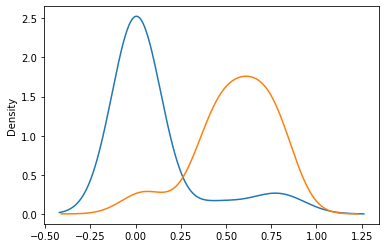

In [16]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [17]:
#!pip install chefboost
from chefboost import Chefboost as chef

In [18]:
config = {'algorithm': 'C4.5'}

In [19]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.410001277923584  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.63636363636364 % on  44  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[21, 3], [2, 18]]
Precision:  87.5 %, Recall:  91.3043 %, F1:  89.3617 %


In [20]:
threshold = 0.33715 #comes from c4.5 algorithm

In [21]:
df["prediction"] = "No"

In [22]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [23]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
39,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,Yes,0.7291,No
10,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6027,No
25,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.7850,No
19,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.6171,No
22,../../dataset/Labeled Faces in the University ...,../../dataset/Labeled Faces in the University ...,No,0.0981,Yes


In [24]:
#!pip install scikit-learn

from sklearn.metrics import confusion_matrix,roc_curve,auc

In [25]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [26]:
tn, fp, fn, tp = cm.ravel()

In [27]:
tn, fp, fn, tp

(21, 2, 3, 18)

In [28]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [31]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  100.0 %
Recall:  57.89473684210527 %
F1 score  73.33333333333334 %
Accuracy:  94.66666666666667 %


In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df["p"] = "No"
roc_point=[]

In [38]:
thresholds = list(np.array(list(range(1,100,1)))/100)
for threshold in thresholds:
    idx = df[df.distance <= threshold].index
    df.loc[idx, 'p'] = 'Yes'
    cm = confusion_matrix(df.Decision.values, df.p.values)
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = tp / (tp + fp)
    roc_point.append([tpr,fpr])
roc_point

[[0.6666666666666666, 0.9333333333333333],
 [0.6666666666666666, 0.9333333333333333],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9473684210526315],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9],
 [0.8571428571428571, 0.9

In [39]:
pivot = pd.DataFrame(roc_point,columns = ['tpr','fpr'])
pivot["threshold"] = thresholds
pivot  

,tpr,fpr,threshold
0,0.666667,0.933333,0.01
1,0.666667,0.933333,0.02
2,0.857143,0.947368,0.03
3,0.857143,0.947368,0.04
4,0.857143,0.947368,0.05
...,...,...,...
94,1.000000,0.477273,0.95
95,1.000000,0.477273,0.96
96,1.000000,0.477273,0.97
97,1.000000,0.477273,0.98


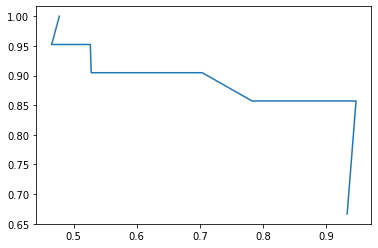

In [40]:
plt.plot(pivot.fpr,pivot.tpr)